In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import numpy as np
import matplotlib.pyplot as plt


In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape
y_train=y_train.reshape(-1,)

In [6]:
classes=["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", "horses", "ships", "trucks"]

Text(0.5, 0, 'frogs')

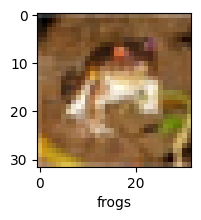

In [7]:
plt.figure(figsize=(15,2))
plt.imshow(X_train[0])
plt.xlabel(classes[y_train[0]])

In [8]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
# normalization of data
X_train=X_train/255
X_test=X_test/255

In [10]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [11]:
cnn=models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(units=64,activation="relu"),
    layers.Dense(units=10,activation="softmax")
])

In [12]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
call_back=tf.keras.callbacks.EarlyStopping(
    monitor="loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [14]:
cnn.fit(X_train,y_train,epochs=20,callbacks=call_back)

Epoch 1/20
1563/1563 [==============================] - 17s 4ms/step - loss: 1.4587 - accuracy: 0.4774
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1059 - accuracy: 0.6126
Epoch 3/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9806 - accuracy: 0.6615
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8969 - accuracy: 0.6893
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8293 - accuracy: 0.7124
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7697 - accuracy: 0.7337
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7244 - accuracy: 0.7491
Epoch 8/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6835 - accuracy: 0.7628
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6389 - accuracy: 0.7758
Epoch 10/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.60

In [15]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 1s 3ms/step - loss: 1.3251 - accuracy: 0.6873


[1.3250600099563599, 0.6873000264167786]

In [16]:
y_pred=cnn.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_pred[1]

array([1.9448566e-14, 1.6062924e-07, 2.1868707e-13, 1.1840890e-19,
       8.9212722e-22, 9.3710420e-24, 2.5634852e-23, 8.9966405e-27,
       9.9999988e-01, 3.9160129e-15], dtype=float32)

In [18]:
y_classess=[np.argmax(element)for element in y_pred]

In [19]:
y_classess[1]

8

In [20]:
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(y_test,y_classess)

array([[712,  26,  90,  22,  24,   5,   9,  15,  73,  24],
       [ 16, 838,  14,   7,  10,   5,   7,   6,  34,  63],
       [ 43,  12, 645,  57, 110,  36,  37,  34,  13,  13],
       [ 25,  14, 106, 506,  86, 121,  50,  58,  26,   8],
       [ 25,   6,  81,  55, 667,  35,  48,  69,  14,   0],
       [ 13,   2,  77, 215,  56, 542,  18,  53,  12,  12],
       [  8,   8,  74,  90,  63,  23, 715,   6,  10,   3],
       [ 16,   3,  45,  44,  75,  45,   9, 742,   7,  14],
       [ 65,  45,  22,  14,  12,   7,   5,   6, 800,  24],
       [ 39, 118,  16,  22,  10,   9,  10,  35,  35, 706]])

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_classess))

              precision    recall  f1-score   support

           0       0.74      0.71      0.73      1000
           1       0.78      0.84      0.81      1000
           2       0.55      0.65      0.59      1000
           3       0.49      0.51      0.50      1000
           4       0.60      0.67      0.63      1000
           5       0.65      0.54      0.59      1000
           6       0.79      0.71      0.75      1000
           7       0.72      0.74      0.73      1000
           8       0.78      0.80      0.79      1000
           9       0.81      0.71      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

